# 1. Perkenalan Dataset

Dataset yang digunakan: **Iris Dataset**
- Sumber: sklearn.datasets (public repository)
- Jumlah sampel: 150
- Jumlah fitur: 4 (sepal length, sepal width, petal length, petal width)
- Target: 3 kelas (setosa, versicolor, virginica)
- Tujuan: Klasifikasi jenis bunga iris

# 2. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("Library berhasil diimport!")

Library berhasil diimport!


# 3. Memuat Dataset

In [ ]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.to_csv('iris_raw.csv', index=False)

print("Dataset berhasil dimuat!")
print(f"Shape: {df.shape}")
df.head()

Dataset berhasil dimuat!
Shape: (150, 6)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# 4. Exploratory Data Analysis (EDA)

In [ ]:
print("Informasi Dataset:")
print(df.info())

print("Statistik Deskriptif:")
print(df.describe())

print("Missing Values:")
print(df.isnull().sum())

print("Distribusi Target:")
print(df['species'].value_counts())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%           

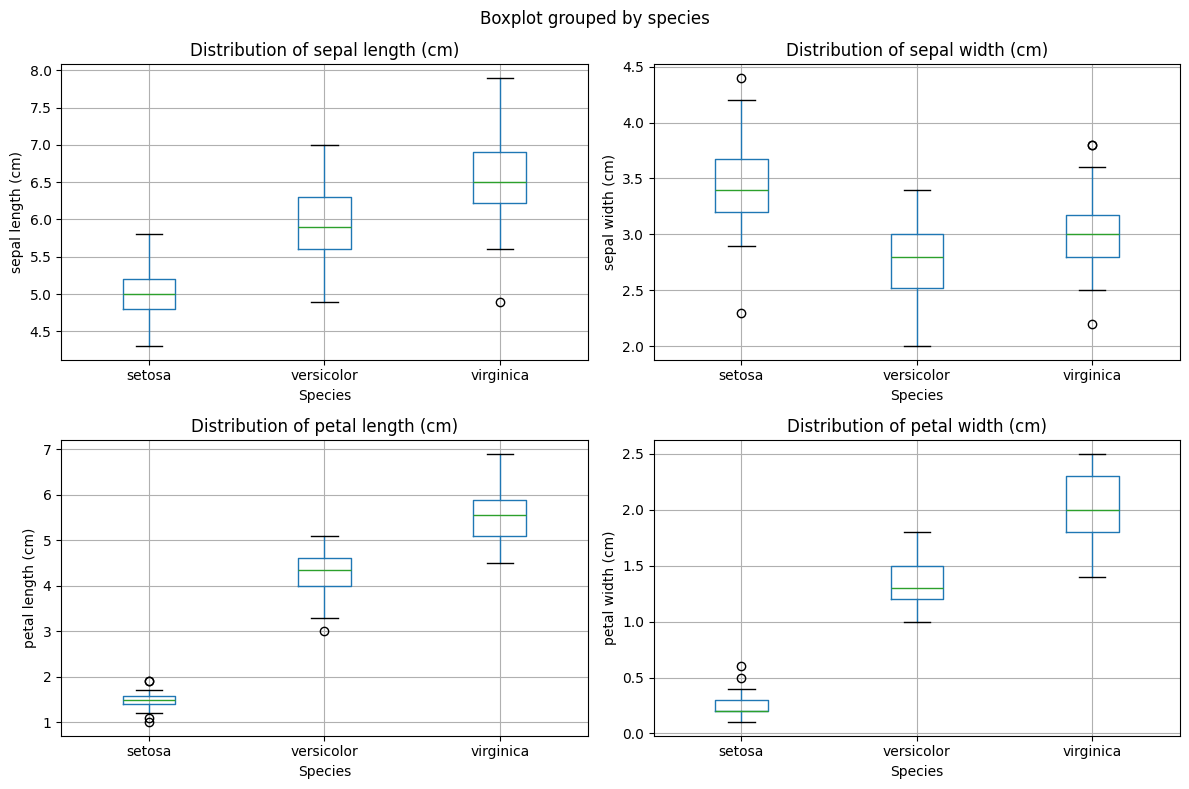

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
features = iris.feature_names

for idx, feature in enumerate(features):
    ax = axes[idx//2, idx%2]
    df.boxplot(column=feature, by='species', ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Species')
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

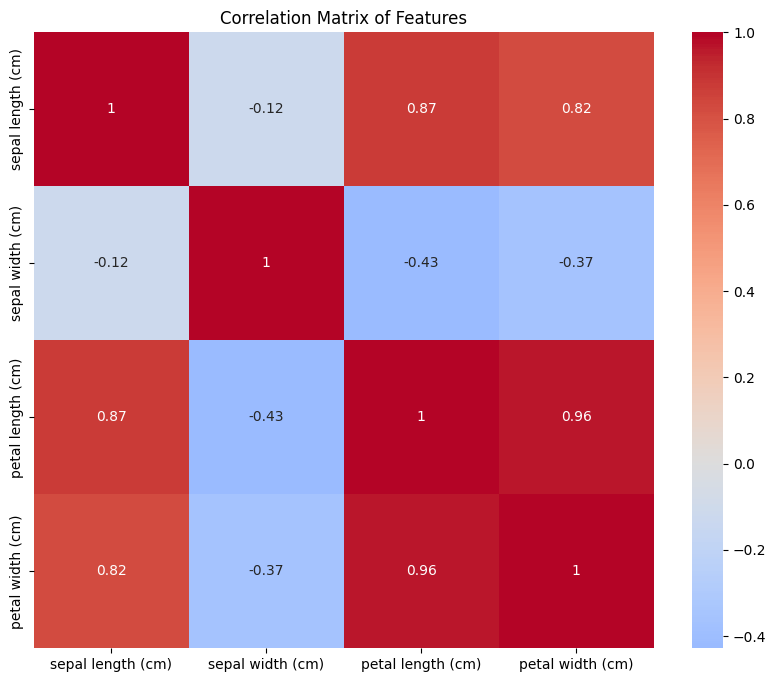

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[iris.feature_names].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

# 5. Data Preprocessing

In [ ]:
print(df.isnull().sum())

df_clean = df.drop_duplicates()

X = df_clean[iris.feature_names]
y = df_clean['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=iris.feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=iris.feature_names)

print("Standardization completed!")

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64
Standardization completed!
